## 1.e Micro-level Non-Residential model

In [21]:
import datetime; print(datetime.datetime.now())

2017-11-01 14:46:28.367982


**Notebook abstract**

A simple micro-level building stock model. The consumption model defined for the building stock works in theory exactly like the other micro level consumption model. The difference between this model and the income, electricity and water demand models is that we don't have a micro-level consumption data set in order to extract regression coefficients. In order to define a consumption model we use predefine building typologies. 

### Compile building level data

In [22]:
from urbanmetabolism._scripts.sqm_data import get_pop_data, get_sqm_data

In [23]:
census_file = 'data/benchmarks_year_bias.csv'

In [24]:
pop_data_1 = get_pop_data(census_file, sqm_nonres_mean = 800)
nr_data = get_sqm_data()
pop_data = get_pop_data(
    census_file,
    sqm_nonres_mean = nr_data.loc[:, 'sqm'].mean(),
)
pop_data_3 = get_pop_data(census_file, sqm_nonres_mean = 500)

In [25]:
benchmarks = pop_data.loc[:,['sqm_nonres', 'num_nonres']]
benchmarks.columns = ['BuildingSqm', 'pop']

In [26]:
kwh_2016 = 6.52 * 1000000

In [27]:
pb_kwh = kwh_2016 / benchmarks.loc[2016, 'BuildingSqm']
pb_kwh_sqm = benchmarks.loc[:, 'pop'].mul(pb_kwh)
benchmarks.insert(1, 'BuildingKwh', pb_kwh_sqm)

In [28]:
benchmarks.loc[2016, 'NonRElectricity'] = kwh_2016

In [29]:
benchmarks.head()

,BuildingSqm,BuildingKwh,pop,NonRElectricity
2010,68716.843636,9989.175844,111.0,NaN
2011,69223.535896,10079.168419,112.0,NaN
2012,69772.846840,10169.160994,113.0,NaN
2013,70361.528759,10259.153569,114.0,NaN
2014,71001.761591,10349.146145,115.0,NaN


In [30]:
benchmarks.to_csv('data/benchmarks_nonresidential.csv')

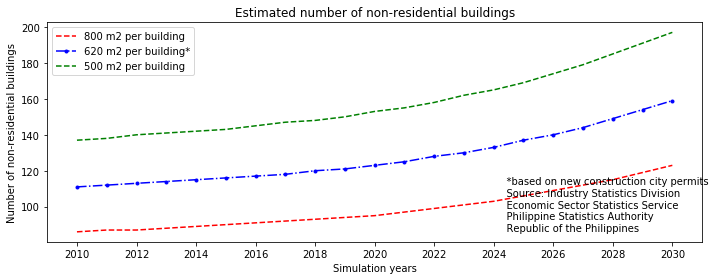

In [31]:
from urbanmetabolism._scripts.sqm_data import plot_nr
plot_nr(pop_data_1, pop_data, pop_data_3, nr_data)

### Prior non-residential model

In [32]:
from urbanmetabolism._scripts.sqm_data import get_count_data
import pandas as pd
count_data = get_count_data()
count_data = count_data.div(count_data.sum())

In [33]:
nrb_elec = pd.DataFrame(columns=['co_mu', 'co_sd', 'p', 'dis', 'lb', 'ub'])

nrb_elec.loc['BuildingSqm', 'co_mu'] = ",".join([str(i) for i in nr_data['sqm']])
nrb_elec.loc['BuildingSqm', 'co_sd'] = ",".join([str(i) for i in nr_data['sqm_sd']])

nrb_elec.loc['BuildingKwh', 'co_mu'] = ",".join([str(i) for i in nr_data['kwh']])
nrb_elec.loc['BuildingKwh', 'co_sd'] = ",".join([str(i) for i in nr_data['kwh_sd']])

nrb_elec.loc[:, 'p'] = ",".join([str(i) for i in count_data['counts']])
nrb_elec.loc['BuildingSqm', 'dis'] = "Deterministic;n;Categorical"
nrb_elec.loc['BuildingKwh', 'dis'] = "Deterministic;BuildingSqm;Categorical"

In [34]:
nrb_elec.to_csv('data/table_elec_nr.csv')

In [35]:
nrb_elec.loc['BuildingSqm', 'dis'] = "Normal;n;Categorical"
nrb_elec.to_csv('data/test_elec_nr_normal.csv')

In [36]:
nrb_elec

,co_mu,co_sd,p,dis,lb,ub
BuildingSqm,"719.587128022,312.594751517,1165.99458393,703....","45.9315047501,27.8888172966,510.591052778,206....","0.0608498641378,0.091606063041,0.0106072914917...",Normal;n;Categorical,NaN,NaN
BuildingKwh,"262,631,592,316,293,233,296,137,243","135.810529783,649.550998768,344.818792991,124....","0.0608498641378,0.091606063041,0.0106072914917...",Deterministic;BuildingSqm;Categorical,NaN,NaN


-----

[UN Environment](http://www.unep.org/)

[Home](Welcome.ipynb)

[Next](Ba_GREGWT_Dynamic.ipynb) (2.a) Dynamic Sampling Model  and GREGWT